# Task 4

In [37]:
from cv2 import imread, cvtColor, COLOR_BGR2RGB, COLOR_RGB2LAB, COLOR_LAB2RGB, split, createCLAHE, \
    merge, COLOR_RGB2BGR, PCACompute2, PCACompute, resize
from matplotlib.pyplot import figure, subplot, title, axis, imshow, tight_layout, show
from numpy import uint8, mgrid, sinc, exp, pi, double, zeros, abs, array, mean, float32, min, max, hstack
from numpy.fft import fftshift, fft2, ifft2, ifftshift
from numpy.random import normal
from sklearn.cluster import MiniBatchKMeans

In [28]:
def load(keyword, code=None):
    # read image by file
    # if code is 0 it reads the image with grayscale
    i =  imread('images/'+keyword+'.jpg', code)
    if i is None:
        i = imread('images/'+keyword+'.jpeg', code)
    if i is None:
        i = imread('images/'+keyword+'.tif', code)
    if i is None:
        print("Not found any ",keyword," jpg or jpeg")
    return i
def rgb(bgr):
    # convert bgr image to rgb
    return cvtColor(bgr, COLOR_BGR2RGB)
def show_images(name, images, desc, col=None, fig_size=(16, 9)):
    figure(figsize=fig_size)
    n = len(images)
    for k in range(0,n):
        img = images[k].astype(uint8)
        tit = name + " " + desc[k]
        if not col is None:
            c = col[k]
            subplot(1,n,k+1), title(tit), axis('off'), imshow(img,cmap=c)
        else :
            subplot(1,n,k+1), title(tit), axis('off'), imshow(img)
    tight_layout()
    show()


def add_gaussian_noise(img,mu=0.,sigma= 0.15):
    noise = normal(mu,sigma,img.shape) * 255
    return img + noise

def generate_variations(img):
    v1 = cvtColor(img, COLOR_RGB2BGR)
    v2 = quantize(img)
    v3 = add_gaussian_noise(img)
    v4 = enhance(img)
    v5 = diagonal_blur(img)
    return array([img,v1,v2,v3,v4,v5])

def quantize(img):
    m,n,_ = img.shape
    lab = cvtColor(img, COLOR_RGB2LAB)
    lab = lab.reshape((m*n, 3))
    clt = MiniBatchKMeans(n_clusters=8)
    labels = clt.fit_predict(lab)
    quantized = clt.cluster_centers_.astype(uint8)[labels]
    quantized = quantized.reshape((m,n,3))
    return cvtColor(quantized,COLOR_LAB2RGB)
def enhance(img):
    lab = cvtColor(img,COLOR_RGB2LAB)
    l,a,b = split(lab)
    clahe = createCLAHE(clipLimit=3.0, tileGridSize=(16,16))
    cl = clahe.apply(l)
    enhanced = merge((cl,a,b))
    return cvtColor(enhanced,COLOR_LAB2RGB)
def diagonal_blur(img, a=4, b=4):
    m,n,_ = img.shape
    [u, v] = mgrid[-m/2:m/2, -n/2:n/2]
    u = 2*u/m
    v = 2*v/n
    h = sinc((u*a) + (v*b)) * exp(-1j*pi*((u*a) + (v*b))).astype(double)
    g = zeros(img.shape, uint8)
    for k in range(0,img.shape[2]):
        c = img[:,:,k].astype(uint8)
        fc = fftshift(fft2(c)) * h
        g[:,:,k] = abs(ifft2(ifftshift(fc)))
    return g

C:\Users\Lorenzo\AppData\Local\Temp/ipykernel_20140/970116547.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
  h = sinc((u*a) + (v*b)) * exp(-1j*pi*((u*a) + (v*b))).astype(double)
C:\Users\Lorenzo\AppData\Local\Temp/ipykernel_20140/970116547.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
  h = sinc((u*a) + (v*b)) * exp(-1j*pi*((u*a) + (v*b))).astype(double)
C:\Users\Lorenzo\AppData\Local\Temp/ipykernel_20140/970116547.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
  h = sinc((u*a) + (v*b)) * exp(-1j*pi*((u*a) + (v*b))).astype(double)


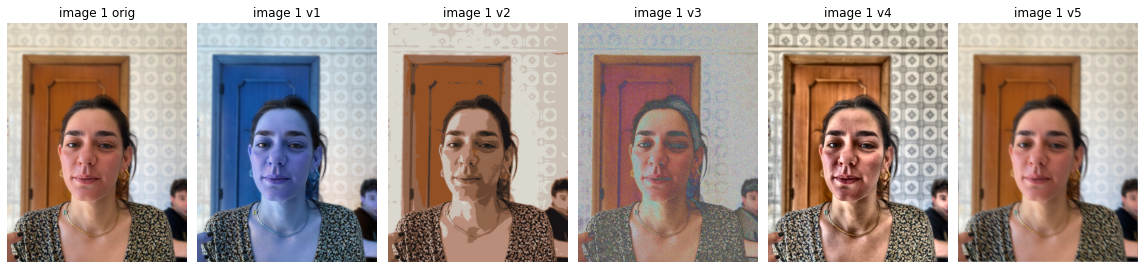

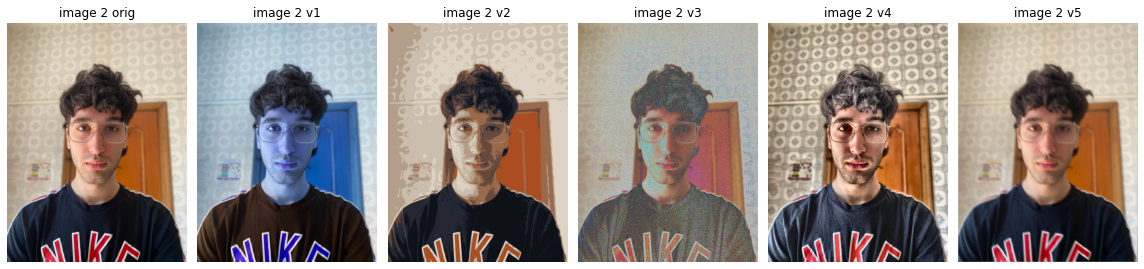

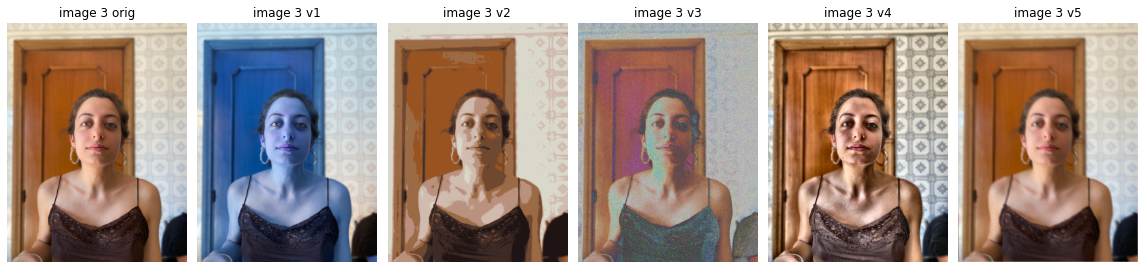

In [29]:
database = [
    generate_variations(rgb(load("P1"))),
    generate_variations(rgb(load("P2"))),
    generate_variations(rgb(load("P3")))
]



show_images("image 1", database[0] , ["orig","v1","v2","v3","v4","v5"])
show_images("image 2", database[1] , ["orig","v1","v2","v3","v4","v5"])
show_images("image 3", database[2] , ["orig","v1","v2","v3","v4","v5"])

In [30]:
def flatten(db):
    people = len(db)
    num_images = len(db[0])
    m,n,c = (db[0][0]).shape
    data = zeros((people*num_images,m*n*c), dtype=float32)
    for k in range(people):
        person_images = db[k]
        for i in range(len(person_images)):
            flat = person_images[i].flatten()
            data[k*i,:] = flat
    return data, (m,n,c), people

In [31]:
database,image_size,num_people = flatten(database)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


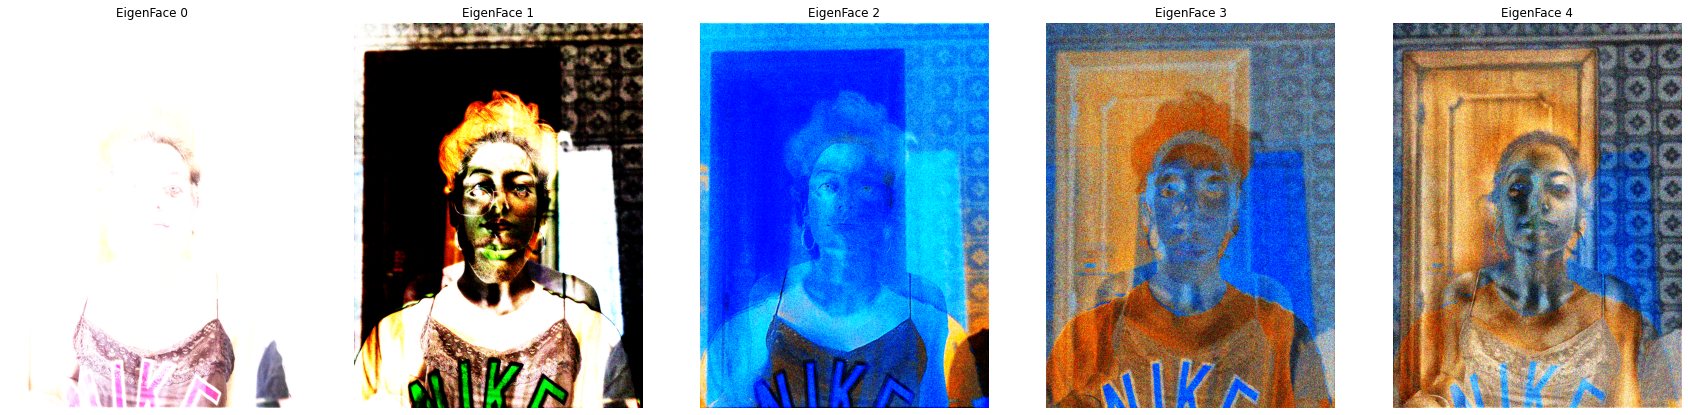

In [46]:
_mean, eigenVectors = PCACompute(database,mean=mean(database,axis=0).reshape(1,-1),maxComponents=5)
averageFace = _mean.reshape(image_size)
eigenFaces = []

l = len(eigenVectors)
figure(figsize=(30,10))

for j in range(l):
    eigenFace = eigenVectors[j].reshape(image_size)
    eigenFaces.append(eigenFace)
    subplot(1,l,j+1), imshow(eigenFace*1e4), axis('off'), title('EigenFace %d'%j)


show()
        

